# <span style="color:red"> **4.Özellik Mühendisliği (Feature Engineering)** </span>

- Bu süreç, ham metnin sayısal bir forma dönüştürülmesini, yani metin temsilini içerir. 

- Makine öğrenimi ve derin öğrenme modelleri, metin verilerini sayısal vektörler halinde işleyebilir. Bu yüzden metin, sayılarla ifade edilen vektörlere dönüştürülmelidir. Metinleri vektör haline getirmek için kullanılan bazı yaygın yöntemler şunlardır:

    - **One Hot Encoding:** Her kelimeyi, sadece bir yerde 1 olan ve diğer yerlerde 0 olan bir vektörle temsil eder.

    - **Count Vectorizer:** Metindeki kelimelerin sayısını belirten bir matris oluşturur.

    - **TF-IDF:** Bir kelimenin bir metin içindeki önemini hesaplar.

    - **Word Embeddings:** Kelimelerin anlamlarını yakalayan ve benzer kelimeleri benzer sayısal vektörlerle ifade eden tekniklerdir.


# <span style="color:#c9486f"> 1- one-hot Encoding </span>

In [4]:
corpus = ['dog eats meat','man eats meat']

In [5]:
vocab = {}   # empty dictionary
count = 0   # initialize count to 0
for doc in corpus:
    for word in doc.split():
        if word not in vocab:
            count = count + 1
            vocab[word] = count  # her bir kelimeye bir sayı atıyoruz
print(vocab)


{'dog': 1, 'eats': 2, 'meat': 3, 'man': 4}


In [6]:
l1 = [0] * 4    # vector of 4 zeros
l1


[0, 0, 0, 0]

In [7]:
l1[0] = 1  # set the first element to 1
l1


[1, 0, 0, 0]

In [8]:
def one_hot(doc):  # bir metin belgesini (doc) girdisi olarak alır ve bu belgedeki her kelimeyi one-hot encoding yöntemiyle bir vektör haline getirir
  one_hot = []  
  for word in doc.split():
    temp = [0]*len(vocab) # vocab uzunluğunda tüm elemanları sıfır olan bir liste (vektör) oluşturur, -1 Python'da indekslemenin 0'dan başlaması nedeniyle kullanılır
    if word in vocab:
      temp[vocab[word]-1] = 1   # kelimenin vocab içindeki indeksine 1 atar
    one_hot.append(temp)    # one_hot listesine ekler
  return one_hot

In [9]:
one_hot("dog eats meat")

[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0]]

### <span style="color:#a95ec5"> **Scikit - Learn** </span>

In [10]:
doc1 = "dog bites meat"
doc2 = 'man eats meat'
doc3 = 'dog bites man'

In [11]:
corpus = [doc1.split(),doc2.split(),doc3.split()]   # split() metni boşluklara göre ayırır
my_overall_data  = corpus[0] + corpus[1] + corpus[2]    # tüm belgeleri birleştirir

print(f"My overall data: {my_overall_data}")

#implement Label Encoder
from sklearn.preprocessing import LabelEncoder

My overall data: ['dog', 'bites', 'meat', 'man', 'eats', 'meat', 'dog', 'bites', 'man']


In [12]:
le = LabelEncoder()
integer_data = le.fit_transform(my_overall_data) # listedek kelimeler LabelEncoder kullanılarak sayısal değerlere dönüştürülüyor. Her farklı kelime, benzersiz bir sayıya karşılık gelir.
print(f"Integer Values are: {integer_data}")

# "dog" kelimesi 1,
# "bites" kelimesi 0,
# "meat" kelimesi 4,
# "man" kelimesi 3,
# "eats" kelimesi 2 olarak kodlanmıştır.

Integer Values are: [1 0 4 3 2 4 1 0 3]


In [13]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit_transform(corpus).toarray()

array([[1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0.]])

In [14]:
one_hot_encoder.transform(["dog eats meat".split()]).toarray()

array([[1., 0., 0., 1., 0., 1.]])

### <span style="color:#a95ec5"> One-hot encoding dezavantajları: </span>

- One-hot vektörlerinin boyutu, kelime haznesinin (vocabulary) büyüklüğüne bağlıdır. Gerçek dünyadaki metin veri kümeleri genellikle çok büyük kelime haznelerine sahiptir, bu da çok büyük vektörlere yol açar.

- One-hot encoding, genellikle veriyi seyrek (sparse) bir şekilde temsil eder. Bu, vektörlerde çoğunlukla 0 olduğu anlamına gelir ve bu da veriyi saklamayı ve işlemeyi zorlaştırır.

- Seyrek vektörler, hem hafızada daha fazla yer kaplar hem de bu vektörlerle yapılan işlemler (hesaplamalar) daha fazla zaman alır. Bu, veriyi saklama, işleme ve öğrenmede verimsizlik yaratır.

- One-hot encoding, kelimelerin sıralamasını dikkate almaz. Ancak, cümlelerdeki kelime sırası genellikle anlam açısından önemlidir. Bu yöntemde kelimeler sadece bağımsız olarak ele alınır.

- Eğitim sırasında karşılaşılmayan kelimeler için one-hot encoding bir temsil sağlayamaz. Bu durum, yeni veya nadir kelimelerle karşılaşıldığında problem yaratır.

- One-hot encoding, kelimenin geçtiği bağlamı dikkate almaz. Her kelime, diğer kelimelerden bağımsız olarak temsil edilir, bu da kelimelerin cümle içindeki anlamını tam olarak yakalayamaz.

# <span style="color:#c9486f"> 2- BoW </span>

- Bag of Words, metin verisinden anlamlı özellikler çıkarmak için kullanılan bir yöntemdir.
- Bu yöntem, metni temsil ederken kelimelerin ne sıklıkta geçtiğine bakar. Örneğin, bir belgede belirli bir kelimenin kaç kez yer aldığını sayar.
- "Bag" (torba) terimi, kelimelerin sırasının veya yapısının bu yöntemde dikkate alınmadığını belirtir. Yani, kelimelerin hangi sırada olduğuna bakılmadan sadece hangi kelimelerin bulunduğu önemlidir.

In [15]:
import pandas as pd
import numpy as np
import collections

In [16]:
doc1 = "Harry Potter is an amazing movie!!"
doc2 = "Harry Potter is the best movie!"
doc3 = "Harry potter is so great"

In [17]:
import re
doc1 = re.sub(r"[^a-zA-Z0-9]"," ",doc1.lower()).split()
doc2 = re.sub(r"[^a-zA-Z0-9]"," ",doc2.lower()).split()
doc3 = re.sub(r"[^a-zA-Z0-9]"," ",doc3.lower()).split()

`re.sub(r"[^a-zA-Z0-9]", " ", doc1.lower()):`

- `doc1.lower()` Cümle önce küçük harflere dönüştürülüyor. Bu, "Harry Potter" gibi büyük harf içeren kelimeleri "harry potter" olarak değiştirir.
- `r"[^a-zA-Z0-9]"` Bu düzenli ifade, harfler (a-z, A-Z) ve rakamlar (0-9) dışındaki tüm karakterleri bulur.
- `" "` Bulunan karakterler bir boşlukla (" ") değiştirilir. Bu, örneğin !! veya ! gibi işaretlerin kaldırılmasını sağlar.
- `.split():` Son olarak, cümle kelimelere ayrılır (liste haline getirilir).

In [18]:
print(doc1)
print(doc2)
print(doc3)

['harry', 'potter', 'is', 'an', 'amazing', 'movie']
['harry', 'potter', 'is', 'the', 'best', 'movie']
['harry', 'potter', 'is', 'so', 'great']


In [19]:
all_words = set(doc1+doc2+doc3)
all_words   # üç cümlede yer alan tüm benzersiz kelimeleri alfabetik olmayan bir sırayla gösterir

{'amazing',
 'an',
 'best',
 'great',
 'harry',
 'is',
 'movie',
 'potter',
 'so',
 'the'}

In [20]:
def BOWrepresentation(all_words, doc):  # bir belgeyi ve tüm kelimeleri alır ve bu belgeyi bir BoW temsiline dönüştürür
  bow = dict.fromkeys(all_words,0)  # all_words içindeki tüm kelimeleri anahtar olarak alır ve değerlerini 0 yapar
  for word in doc:
    bow[word] = doc.count(word)  # Eğer kelime o metinde geçiyorsa, o kelimenin kaç kez geçtiğini bow sözlüğüne yazar
  return bow

In [21]:
bow1 = BOWrepresentation(all_words,doc1)
bow1

{'great': 0,
 'potter': 1,
 'so': 0,
 'best': 0,
 'the': 0,
 'movie': 1,
 'is': 1,
 'harry': 1,
 'amazing': 1,
 'an': 1}

In [22]:
bow2 = BOWrepresentation(all_words,doc2)
bow3 = BOWrepresentation(all_words,doc3)
df_bow = pd.DataFrame([bow1,bow2,bow3])
df_bow

,great,potter,so,best,the,movie,is,harry,amazing,an
0,0,1,0,0,0,1,1,1,1,1
1,0,1,0,1,1,1,1,1,0,0
2,1,1,1,0,0,0,1,1,0,0


### <span style="color:#a95ec5"> **Scikit - Learn** </span>

CountVectorizer sınıfı, metin verisini kelime frekanslarına dayalı olarak sayısal vektörlere dönüştürmek için kullanılır.

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary=True) # binary=True, kelimenin belgede geçip geçmediğini belirler
doc1 = "Harry Potter is an amazing movie!!"
doc2 = "Harry Potter is the best movie!"
doc3 = "Harry potter is so great"
cv_out = cv.fit_transform([doc1,doc2,doc3])

In [24]:
cv_out.toarray()

array([[1, 1, 0, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 0, 1, 1, 1, 1, 0, 1],
       [0, 0, 0, 1, 1, 1, 0, 1, 1, 0]], dtype=int64)

In [25]:
pd.DataFrame(cv_out.toarray(), columns= cv.get_feature_names_out())     # get_feature_names_out() metodu, kelime kelime kelime listesini döndürür

,amazing,an,best,great,harry,is,movie,potter,so,the
0,1,1,0,0,1,1,1,1,0,0
1,0,0,1,0,1,1,1,1,0,1
2,0,0,0,1,1,1,0,1,1,0


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
doc1 = "Harry Potter is an amazing movie , harry!!"
doc2 = "Harry Potter is the best movie!"
doc3 = "Harry potter is so great"
cv_out = cv.fit_transform([doc1,doc2,doc3])
pd.DataFrame(cv_out.toarray(), columns= cv.get_feature_names_out())

,amazing,an,best,great,harry,is,movie,potter,so,the
0,1,1,0,0,2,1,1,1,0,0
1,0,0,1,0,1,1,1,1,0,1
2,0,0,0,1,1,1,0,1,1,0


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,3)) # unigram, bigram, trigram
doc1 = "Harry Potter is an amazing movie , harry!!"
doc2 = "Harry Potter is the best movie!"
doc3 = "Harry potter is so great"
cv_out = cv.fit_transform([doc1,doc2,doc3])
pd.DataFrame(cv_out.toarray(), columns= cv.get_feature_names_out())

,amazing,amazing movie,amazing movie harry,an,an amazing,an amazing movie,best,best movie,great,harry,...,potter,potter is,potter is an,potter is so,potter is the,so,so great,the,the best,the best movie
0,1,1,1,1,1,1,0,0,0,2,...,1,1,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,0,1,...,1,1,0,0,1,0,0,1,1,1
2,0,0,0,0,0,0,0,0,1,1,...,1,1,0,1,0,1,1,0,0,0



### <span style="color:#a95ec5"> N-Gram Yönteminin Avantajları: </span>

- N-gramlar, kelimelerin yalnızca sıklığını değil, aynı zamanda cümledeki sıralarını ve birbirleriyle olan bağlamlarını da yakalayabilir. Bu, metinlerdeki kelime kombinasyonlarının anlamını daha iyi temsil etmeye yardımcı olur.

- Aynı n-gramlara sahip olan belgeler, birbirine daha yakın vektörlerle temsil edilir. Bu, metinlerin Euclidean (Öklidyen) uzayında birbirine yakın olmasını sağlar. Bu özellik, benzer belgeleri gruplama veya sınıflandırma görevlerinde faydalıdır.


### <span style="color:#a95ec5"> N-Gram Yönteminin Dezavantajları: </span>

- N değeri arttıkça (yani unigramdan bigrama, trigramdan daha büyük n-gramlara geçtikçe), veri boyutu hızla büyür. Bu durum, vektörlerin büyük bir kısmının 0 olmasıyla sonuçlanır ve bu da seyrek matrisler (sparsity) oluşturur. Bu tür matrisler, veriyi saklama ve işleme açısından verimsiz olabilir.

- N-gramlar, eğitim sırasında karşılaşılmayan (Out-of-Vocabulary, OOV) yeni kelime kombinasyonlarını işleyemez. Bu durum, n-gram modelinin yeni metinlerle karşılaştığında zorlanmasına neden olabilir.

# <span style="color:#c9486f"> 3. TF-IDF (Term Frequency-Inverse Document Frequency) yöntemi  </span>

- Daha önceki yaklaşımlarda (örneğin, CountVectorizer) her kelimenin metin içindeki önemi eşit kabul ediliyordu. Bu, sık kullanılan kelimelerin de nadir kelimelerle aynı değerde olmasına neden olur.
- TF-IDF, bir kelimenin önemini metin içindeki diğer kelimelere ve korpustaki diğer metinlere göre ölçer. Bu, önemli kelimeleri öne çıkarmayı ve önemsiz olanları arka plana atmayı sağlar.

- **Neden IDF Gereklidir?** Sık kullanılan kelimeler (örneğin "is", "are") yüksek terim frekansına sahip olur ve bu da bu kelimelerin metinde daha önemli gibi görünmesine neden olur.Bu tür sık kullanılan kelimelerin önemini azaltmak ve daha az kullanılan ama önemli olan kelimelere daha fazla ağırlık vermek için IDF kullanılır.




| ÖNEMLİ                                                                                     |
|--------------------------------------------------------------------------------------------|
| Bir kelimenin bir belgede en çok tekrarlandığında, ancak başka hiçbir belgede bulunmadığında skor yüksek olur | 
| Stopwords - skor düşük olur                                                                | 
| Bir cümlede tekrarlanan benzersiz kelimeler - skor yüksek olur                             | 



In [28]:
import pandas as pd
import math
import sklearn

In [29]:
first_sent = "Data Science is an Amazing career in the current world"
second_sent = "Deep learning is a subset of machine learning"

first_sent = first_sent.split(" ")
second_sent = second_sent.split(' ')
vocab = set(first_sent).union(set(second_sent)) # Kümeler aynı kelimenin birden fazla geçmesini engeller ve sadece benzersiz kelimeleri saklar.
                                                # .union() fonksiyonu, bu iki kümenin birleşimini alır, yani her iki cümledeki tüm benzersiz kelimeleri bir araya getirir.
vocab

{'Amazing',
 'Data',
 'Deep',
 'Science',
 'a',
 'an',
 'career',
 'current',
 'in',
 'is',
 'learning',
 'machine',
 'of',
 'subset',
 'the',
 'world'}

In [30]:
wordDict1 = dict.fromkeys(vocab,0)  # vocab içindeki tüm kelimeleri anahtar olarak alır ve değerlerini 0 yapar
wordDict2 = dict.fromkeys(vocab,0)
print(wordDict1, "\n",wordDict2)

{'career': 0, 'in': 0, 'world': 0, 'the': 0, 'a': 0, 'of': 0, 'is': 0, 'Data': 0, 'current': 0, 'learning': 0, 'subset': 0, 'Science': 0, 'Amazing': 0, 'machine': 0, 'Deep': 0, 'an': 0} 
 {'career': 0, 'in': 0, 'world': 0, 'the': 0, 'a': 0, 'of': 0, 'is': 0, 'Data': 0, 'current': 0, 'learning': 0, 'subset': 0, 'Science': 0, 'Amazing': 0, 'machine': 0, 'Deep': 0, 'an': 0}


In [31]:
#FREKANS HESAPLAMA
for word in first_sent:
  wordDict1[word] += 1  # kelimenin vocab içindeki indeksine 1 ekler. Böylece, first_sent içinde kaç kez geçtiği sayılır.

for word in second_sent:
  wordDict2[word] += 1
  
print(first_sent, "\n", wordDict1, "\n")
print(second_sent, "\n",wordDict2)

['Data', 'Science', 'is', 'an', 'Amazing', 'career', 'in', 'the', 'current', 'world'] 
 {'career': 1, 'in': 1, 'world': 1, 'the': 1, 'a': 0, 'of': 0, 'is': 1, 'Data': 1, 'current': 1, 'learning': 0, 'subset': 0, 'Science': 1, 'Amazing': 1, 'machine': 0, 'Deep': 0, 'an': 1} 

['Deep', 'learning', 'is', 'a', 'subset', 'of', 'machine', 'learning'] 
 {'career': 0, 'in': 0, 'world': 0, 'the': 0, 'a': 1, 'of': 1, 'is': 1, 'Data': 0, 'current': 0, 'learning': 2, 'subset': 1, 'Science': 0, 'Amazing': 0, 'machine': 1, 'Deep': 1, 'an': 0}


In [32]:
df = pd.DataFrame([wordDict1,wordDict2])   # dataFrame oluşturulur
df

,career,in,world,the,a,of,is,Data,current,learning,subset,Science,Amazing,machine,Deep,an
0,1,1,1,1,0,0,1,1,1,0,0,1,1,0,0,1
1,0,0,0,0,1,1,1,0,0,2,1,0,0,1,1,0


<span style="color:#2c82c8"> 

-------------------------------------------------------------------------------------------
### **Terim Frekansını(TF) Hesaplama**
</span>

In [33]:
def calculateTF(wordDict, doc):
  tfDict = {}
  len_corpus = len(doc) #belgedeki toplam kelime sayısı

  for word,count in wordDict.items():
    tfDict[word] = count/len_corpus # kelimenin geçiş sayısı / toplam kelime sayısı
  
  return tfDict

In [34]:
tf1 = calculateTF(wordDict1,first_sent)
tf2 = calculateTF(wordDict2,second_sent)

In [35]:
tf1 = calculateTF(wordDict1,first_sent)
tf2 = calculateTF(wordDict2,second_sent)

In [36]:
tf = pd.DataFrame([tf1,tf2])
tf

,career,in,world,the,a,of,is,Data,current,learning,subset,Science,Amazing,machine,Deep,an
0,0.1,0.1,0.1,0.1,0.000,0.000,0.100,0.1,0.1,0.00,0.000,0.1,0.1,0.000,0.000,0.1
1,0.0,0.0,0.0,0.0,0.125,0.125,0.125,0.0,0.0,0.25,0.125,0.0,0.0,0.125,0.125,0.0


In [37]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iremg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
# wordDict1 içindeki tüm kelimeleri küçük harf olarak alır ve bu kelimelerin İngilizce stopwords listesinde olup olmadığını kontrol eder. 
# Eğer kelime stopwords değilse, bu kelime yeni bir listeye eklenir.

# list comprehension
f1 = [word for word in wordDict1 if word.lower() not in stopwords.words('english') ]
f2 = [word for word in wordDict2 if word.lower() not in stopwords.words('english') ]


print(wordDict1, "\n", f1 , "\n\n")
print(wordDict2, "\n", f2)                  # stopwords listesinde olmayan kelimeleri gösterir

{'career': 1, 'in': 1, 'world': 1, 'the': 1, 'a': 0, 'of': 0, 'is': 1, 'Data': 1, 'current': 1, 'learning': 0, 'subset': 0, 'Science': 1, 'Amazing': 1, 'machine': 0, 'Deep': 0, 'an': 1} 
 ['career', 'world', 'Data', 'current', 'learning', 'subset', 'Science', 'Amazing', 'machine', 'Deep'] 


{'career': 0, 'in': 0, 'world': 0, 'the': 0, 'a': 1, 'of': 1, 'is': 1, 'Data': 0, 'current': 0, 'learning': 2, 'subset': 1, 'Science': 0, 'Amazing': 0, 'machine': 1, 'Deep': 1, 'an': 0} 
 ['career', 'world', 'Data', 'current', 'learning', 'subset', 'Science', 'Amazing', 'machine', 'Deep']


<span style="color:#2c82c8"> 

-------------------------------------------------------------------------------------------
### **IDF hesaplama**
</span>

In [39]:
#  TF-IDF (Term Frequency-Inverse Document Frequency) hesaplama
def calculateIDF(doc):
  idfDict = {}
  len_doc = len(doc)

  # tüm kelimeleri içeren ve başlangıçta değerleri 0 olarak ayarlanmış bir sözlük oluşturur. 
  # Bu sözlükte her kelime, anahtar (key) olarak saklanır ve karşılığı olan değer (value) ise başlangıçta 0 olarak belirlenir
  idfDict = dict.fromkeys(doc[0].keys(), 0)
  for word, val in idfDict.items():
      idfDict[word] = math.log10(len_doc / (float(val) + 1))  #Belirli bir kelimenin kaç belgede geçtiğini kontrol eder ve bunu tüm belgelerin sayısına böler. 
        
  return(idfDict)

In [40]:
# belirli bir kelimenin bir belgede ne kadar önemli olduğunu gösterir
idfs = calculateIDF([wordDict1, wordDict2])

In [41]:
df= pd.DataFrame([tf1,tf2,idfs])
df

,career,in,world,the,a,of,is,Data,current,learning,subset,Science,Amazing,machine,Deep,an
0,0.10000,0.10000,0.10000,0.10000,0.00000,0.00000,0.10000,0.10000,0.10000,0.00000,0.00000,0.10000,0.10000,0.00000,0.00000,0.10000
1,0.00000,0.00000,0.00000,0.00000,0.12500,0.12500,0.12500,0.00000,0.00000,0.25000,0.12500,0.00000,0.00000,0.12500,0.12500,0.00000
2,0.30103,0.30103,0.30103,0.30103,0.30103,0.30103,0.30103,0.30103,0.30103,0.30103,0.30103,0.30103,0.30103,0.30103,0.30103,0.30103


<span style="color:#2c82c8"> 

-------------------------------------------------------------------------------------------
### **TF-IDF (Term Frequency-Inverse Document Frequency) hesaplama**
</span>

In [42]:
def computeTFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return(tfidf)
idf1 = computeTFIDF(tf1, idfs)
idf2 = computeTFIDF(tf2, idfs)

idf= pd.DataFrame([idf1, idf2])
idf

,career,in,world,the,a,of,is,Data,current,learning,subset,Science,Amazing,machine,Deep,an
0,0.030103,0.030103,0.030103,0.030103,0.000000,0.000000,0.030103,0.030103,0.030103,0.000000,0.000000,0.030103,0.030103,0.000000,0.000000,0.030103
1,0.000000,0.000000,0.000000,0.000000,0.037629,0.037629,0.037629,0.000000,0.000000,0.075257,0.037629,0.000000,0.000000,0.037629,0.037629,0.000000


<span style="color:#a95ec5"> 

-------------------------------------------------------------------------------------------
### **Sklearn Library**
</span>

TfidfVectorizer sınıfı verilen metinlerin TF-IDF skorlarını hesaplamak için kullanılır.

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
first_sent = "Data Science is an Amazing career in the current world"
second_sent = "Deep learning is a subset of machine learning"

vec = TfidfVectorizer()
result = vec.fit_transform([first_sent,second_sent])
result.toarray()

array([[0.32433627, 0.32433627, 0.32433627, 0.32433627, 0.32433627,
        0.        , 0.32433627, 0.23076793, 0.        , 0.        ,
        0.        , 0.32433627, 0.        , 0.32433627, 0.32433627],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.34287126, 0.        , 0.24395573, 0.68574252, 0.34287126,
        0.34287126, 0.        , 0.34287126, 0.        , 0.        ]])

In [44]:
pd.DataFrame(result.toarray(),columns= vec.get_feature_names_out())

,amazing,an,career,current,data,deep,in,is,learning,machine,of,science,subset,the,world
0,0.324336,0.324336,0.324336,0.324336,0.324336,0.000000,0.324336,0.230768,0.000000,0.000000,0.000000,0.324336,0.000000,0.324336,0.324336
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.342871,0.000000,0.243956,0.685743,0.342871,0.342871,0.000000,0.342871,0.000000,0.000000


<span style="color:#c9486f">

--------------------------------------------------
 # 4. Word Embeddings 
  </span>

  **Word Embeddings** (Kelime Gömmeleri), kelimeleri sayısal vektörler olarak temsil etmenin bir yoludur. Bu yaklaşım, benzer anlamlara sahip kelimelerin sayısal olarak benzer vektörlerle temsil edilmesini sağlar. Kelime gömmeleri, kelimelerin anlamlarını ve bağlamlarını düşük boyutlu bir uzayda modelleyerek, kelimeler arasındaki anlamsal ilişkileri yakalamaya olanak tanır.

Özetle:
- Kelimeleri sayısal vektörlerle temsil eder.
- Benzer anlamdaki kelimeleri benzer vektörlerle gösterir.
- Kelimeleri düşük boyutlu bir uzayda modelleyerek anlamsal ilişkileri yakalar.

Bu tür kelime temsilleri, metin verisi ile çalışan makine öğrenimi ve doğal dil işleme projelerinde yaygın olarak kullanılır. Örneğin, **Flair**, **fastText**, **SpaCy** gibi önceden eğitilmiş modeller, word embeddings kullanarak metinleri anlamlandırma ve işlemeye yardımcı olur.


<span style="color:#2c82c8">

--------------------------------------------------
 ## **Kelime Vectörü - Word2Vec**
  </span>



Kelime vektörü, doğal dil işleme (NLP) alanında kullanılan bir tekniktir. Kelimeleri sayısal (numerik) vektörler olarak temsil eder. Bu vektörler, kelimelerin anlamlarını matematiksel bir biçimde ifade etmek amacıyla yüksek boyutlu uzayda (genellikle 100-300 boyutlu) yer alır. Kelimeler arasındaki anlam ilişkileri, bu vektörlerin uzayda nasıl yerleştirildiğiyle ilgilidir. Örneğin, anlamca birbirine yakın kelimeler (örneğin "kral" ve "kraliçe") uzayda birbirine daha yakın vektörlerle temsil edilir.

**Kelime Vektörü Ne İçin Kullanılır?**

Kelime vektörleri, birçok NLP görevinde kullanılır. Bunlardan bazıları şunlardır:

- **Kelime Benzerliği ve Anlam Analizi:** İki kelimenin benzer olup olmadığını ölçmek için kullanılır. Örneğin, "kral" ve "kraliçe" kelimeleri arasındaki ilişki, bu kelimelerin vektörlerinin birbirine yakınlığı ile ölçülebilir.

- **Anlamlı Sözcük Grupları Bulma:** Aynı kategoriye ait kelimeleri gruplayabilir. Örneğin, "elma", "armut", "muz" gibi kelimeler, meyve kategorisinde yer alır ve vektörleri birbirine yakın olabilir.

- **Makine Çevirisi:** Diller arası çevirilerde kelime anlamlarını daha iyi yakalayabilmek için kullanılır.

- **Metin Sınıflandırma:** Belgelerin sınıflandırılmasında kullanılabilir. Bir belgenin sınıfı, o belgede yer alan kelimelerin vektörlerinden elde edilen ortalama vektör ile belirlenebilir.

- **Kelime Anlamı ile İlgili Sorunların Çözümü:** Özellikle homonimler (aynı yazılışa sahip farklı anlamlı kelimeler) için, kelime vektörleri anlam farklılıklarını belirlemek için kullanılabilir.



**Kelime Vektörleri Nasıl Kullanılır?**
- **Benzer Kelimeleri Bulma:** Bir kelimenin vektörü, diğer kelimelerin vektörleriyle karşılaştırılarak en benzer kelimeler bulunabilir.

- **Matematiksel Operasyonlar:** Kelime vektörleri üzerinde toplama ve çıkarma işlemleri yapılarak, anlamlı sonuçlar elde edilebilir. Örneğin, "kral" - "adam" + "kadın" işlemi, "kraliçe" kelimesine yakın bir vektör üretir.


Word2Vec, kelimeleri sayısal vektörler olarak temsil etmek için kullanılan popüler bir derin öğrenme modelidir. 2013 yılında Google tarafından geliştirilen bu model, kelimeler arasındaki anlamsal ilişkileri öğrenmek ve bu ilişkileri düşük boyutlu vektörler halinde temsil etmek için tasarlanmıştır.

**Word2Vec Modelinin Özellikleri:**
- `Dağıtımsal Hipotez:` Model, "bir kelimenin anlamı, çevresindeki kelimelerle belirlenir" ilkesine dayanır. Yani, bir kelimenin anlamını öğrenmek için o kelimenin diğer kelimelerle birlikte nasıl kullanıldığını gözlemler.

**İki Temel Varyantı Vardır:**
- **CBOW (Continuous Bag of Words):** Bu varyant, hedef kelimenin etrafındaki bağlam kelimelerini kullanarak o kelimeyi tahmin eder. Daha hızlı bir modeldir ve genellikle küçük veri setlerinde iyi sonuç verir.
- **Skip-gram:** Bu varyant, hedef kelimeyi kullanarak çevresindeki bağlam kelimelerini tahmin eder. Büyük veri setlerinde daha iyi performans gösterir ve kelimeler arasındaki ince anlamsal farkları daha iyi yakalar.

**Word2Vec'in Çalışma Prensibi:**
- Word2Vec, bir kelimenin sayısal temsilini (vektör) öğrenmek için büyük miktarda metin verisi kullanır. Model, kelimeleri belirli bir boyutta (örneğin 100, 200, 300 boyutlu) vektörler olarak temsil eder.
- Kelimeler arasındaki anlamsal yakınlık, bu vektörlerin birbirine yakınlığı ile belirlenir. Örneğin, "kral" ve "kraliçe" gibi kelimeler, Word2Vec modeli tarafından benzer vektörler olarak temsil edilir.

In [45]:
!pip install gensim
!pip install python-Levenshtein


In [46]:
import gensim.downloader as api

# Google News Word2Vec modelini indir ve yükle
model = api.load('word2vec-google-news-300')

# Kelime vektörlerini inceleme
word_vector = model['computer']

# kelimenin yüksek boyutlu uzayda temsilini oluşturan 300 adet kayan nokta sayısını (float) ekrana yazdırır
print(f"'Computer' kelimesinin vektörü: {word_vector}")

# Benzer kelimeleri bulma
# Benzerlik, kosinüs benzerliği (cosine similarity) temelinde hesaplanır. 
# Kod, en benzer kelimelerin bir listesini ve bu kelimelerin benzerlik puanlarını ekrana yazdırır.
similar_words = model.most_similar('computer')
print("Computer kelimesine en yakın kelimeler:")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.2f}")


'Computer' kelimesinin vektörü: [ 1.07421875e-01 -2.01171875e-01  1.23046875e-01  2.11914062e-01
 -9.13085938e-02  2.16796875e-01 -1.31835938e-01  8.30078125e-02
  2.02148438e-01  4.78515625e-02  3.66210938e-02 -2.45361328e-02
  2.39257812e-02 -1.60156250e-01 -2.61230469e-02  9.71679688e-02
 -6.34765625e-02  1.84570312e-01  1.70898438e-01 -1.63085938e-01
 -1.09375000e-01  1.49414062e-01 -4.65393066e-04  9.61914062e-02
  1.68945312e-01  2.60925293e-03  8.93554688e-02  6.49414062e-02
  3.56445312e-02 -6.93359375e-02 -1.46484375e-01 -1.21093750e-01
 -2.27539062e-01  2.45361328e-02 -1.24511719e-01 -3.18359375e-01
 -2.20703125e-01  1.30859375e-01  3.66210938e-02 -3.63769531e-02
 -1.13281250e-01  1.95312500e-01  9.76562500e-02  1.26953125e-01
  6.59179688e-02  6.93359375e-02  1.02539062e-02  1.75781250e-01
 -1.68945312e-01  1.21307373e-03 -2.98828125e-01 -1.15234375e-01
  5.66406250e-02 -1.77734375e-01 -2.08984375e-01  1.76757812e-01
  2.38037109e-02 -2.57812500e-01 -4.46777344e-02  1.884765

In [47]:
import gensim

model_path = "GoogleNews-vectors-negative300.bin"

model = gensim.models.KeyedVectors.load_word2vec_format(model_path,
                                                         binary=True) # modeli yükleme ve binary=True ile modelin ikili dosya olduğunu belirtme

In [48]:
# Kelime dağarcığını almak için `index_to_key` kullanıyoruz
vocab = list(model.index_to_key)

# İlk 5 kelimeyi yazdırma
print(vocab[:5])


['</s>', 'in', 'for', 'that', 'is']


In [49]:
from random import choice

# Kelime dağarcığından rastgele bir kelime seçme
random_word = choice(vocab)
print(f"Rastgele seçilen kelime: {random_word}")


Rastgele seçilen kelime: olfactory_ensheathing_cells


In [50]:
word_vector = model[random_word]    
print(f"'{random_word}' kelimesinin vektörü: {word_vector[:10]}")


'olfactory_ensheathing_cells' kelimesinin vektörü: [-0.0625      0.03979492  0.00982666 -0.06787109 -0.08740234  0.0057373
 -0.00631714 -0.02563477 -0.01135254 -0.00686646]


In [51]:
len(vocab)

3000000

In [52]:
for i in range(10):
  print(choice(vocab))

Varian_Semi
Vaclav_Havel
Amy_Hollstein_Pembroke
ICICI_Pru_Life
cotton_grower
contributor_Selena_Maranjian
Stenbit
Briese
STRAY_ROD_blared
ankle_niggle


In [53]:
def check_vocab(model, check_words):
    print("%40s %s" % ("word", "Present"))
    print("%40s %s" % ("-"*5, "-----"))

    for word in check_words:
        print("%40s %s" % (word, word in model.key_to_index))

check_vocab(model, ['Narendra', 'trump', 'data', 'machine', 'nlp'])


                                    word Present
                                   ----- -----
                                Narendra True
                                   trump True
                                    data True
                                 machine True
                                     nlp False


In [54]:
check_vocab(model, ['Narendra_modi','donald_trump','united_states','united_kingdom'])

                                    word Present
                                   ----- -----
                           Narendra_modi False
                            donald_trump True
                           united_states False
                          united_kingdom False


In [55]:
check_vocab(model, ['Narendra_Modi','Donald_Trump','United_States','United_Kingdom'])

                                    word Present
                                   ----- -----
                           Narendra_Modi True
                            Donald_Trump True
                           United_States True
                          United_Kingdom True


In [56]:
!pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [57]:
vector = model.word_vec("Narendra_Modi")
print(vector.shape)

(300,)


C:\Users\iremg\AppData\Local\Temp\ipykernel_14976\1098050927.py:1: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  vector = model.word_vec("Narendra_Modi")


In [58]:
vector

array([ 2.42187500e-01,  2.28515625e-01,  3.43750000e-01,  5.31250000e-01,
       -3.41796875e-01, -3.71093750e-01, -1.72851562e-01,  1.43554688e-01,
        1.07421875e-01,  4.95605469e-02,  2.02636719e-02, -1.25976562e-01,
       -3.08593750e-01, -9.46044922e-03, -1.79687500e-01,  2.55859375e-01,
       -6.54296875e-02, -2.53906250e-01, -4.88281250e-02,  8.59375000e-02,
        3.82812500e-01,  1.40625000e-01,  1.35742188e-01, -6.00585938e-02,
       -1.85546875e-01,  1.56250000e-01, -9.57031250e-02, -2.89062500e-01,
        5.15625000e-01,  3.18908691e-03, -2.50000000e-01, -1.73828125e-01,
       -3.30078125e-01,  5.35156250e-01, -2.49023438e-01,  3.47656250e-01,
       -2.04101562e-01, -2.04101562e-01,  3.76953125e-01, -5.68847656e-02,
        4.25781250e-01, -6.25000000e-02,  3.08593750e-01,  4.49218750e-01,
        2.37304688e-01, -4.60937500e-01, -1.67968750e-01,  1.08886719e-01,
       -6.65283203e-03,  1.37695312e-01, -6.88476562e-02,  1.31835938e-01,
        2.96875000e-01, -

In [59]:
print(f"Narendra_Modi vektörünün büyüklüğü: {np.linalg.norm(vector)}")

Narendra_Modi vektörünün büyüklüğü: 4.041469573974609


C:\Users\iremg\AppData\Local\Temp\ipykernel_14976\2390323353.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vector, kde=False, rug=True) # kde=False, çizgiyi kaldırır, rug=True, verilerin dağılımını gösterir


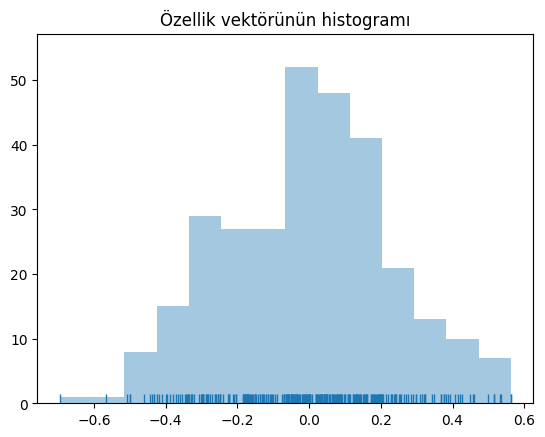

In [60]:
sns.distplot(vector, kde=False, rug=True) # kde=False, çizgiyi kaldırır, rug=True, verilerin dağılımını gösterir
plt.title("Özellik vektörünün histogramı")
plt.show()

<span style="color:#808000">

--------------------------------------------------
 ## **2 Kelime Arasındaki Benzerlik**
  </span>

  Eğer iki kelime arasındaki kosinüs benzerliği artarsa, bu kelimelerin anlamlarının daha yakın olduğu anlamına gelir. 


In [61]:
word1 = 'bread'
word2 = 'jam'
score = model.similarity(word1,word2)
print(f"arasındaki kosinüs benzerliği {word1} & {word2} is {score}")

arasındaki kosinüs benzerliği bread & jam is 0.22019492089748383


In [62]:
word1 = 'bread'
word2 = 'butter'
score = model.similarity(word1,word2)
print(f"arasındaki kosinüs benzerliği {word1} & {word2} is {score}")

arasındaki kosinüs benzerliği bread & butter is 0.6417260766029358


In [63]:
word1 = 'cycle'
word2 = 'bicycle'
score = model.similarity(word1,word2)
print(f"arasındaki kosinüs benzerliği {word1} & {word2} is {score}")

arasındaki kosinüs benzerliği cycle & bicycle is 0.16222114861011505


In [64]:
word1 = 'computer'
word2 = 'pc'
score = model.similarity(word1,word2)
print(f"arasındaki kosinüs benzerliği {word1} & {word2} is {score}")

arasındaki kosinüs benzerliği computer & pc is 0.2656373977661133


In [65]:
word1 = 'amazing'
word2 = 'incredible'
score = model.similarity(word1,word2)
print(f"arasındaki kosinüs benzerliği {word1} & {word2} is {score}")

arasındaki kosinüs benzerliği amazing & incredible is 0.9054000377655029


In [66]:
# most similar words

word = 'computer'
result = model.most_similar(positive=[word], topn=5)
print(f"'{word}' kelimesine en yakın kelimeler: {result}")


'computer' kelimesine en yakın kelimeler: [('computers', 0.7979379892349243), ('laptop', 0.6640493273735046), ('laptop_computer', 0.6548868417739868), ('Computer', 0.647333562374115), ('com_puter', 0.6082080006599426)]
